***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-classification" data-toc-modified-id="Introduction-to-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to classification</a></span></li><li><span><a href="#A-classic-example:-the-Iris-dataset" data-toc-modified-id="A-classic-example:-the-Iris-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A classic example: the Iris dataset</a></span></li><li><span><a href="#Goal:-Learn-a-classifier" data-toc-modified-id="Goal:-Learn-a-classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Goal: Learn a classifier</a></span></li><li><span><a href="#Load-the-dataset-using-scikit-learn" data-toc-modified-id="Load-the-dataset-using-scikit-learn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the dataset using <code>scikit-learn</code></a></span></li><li><span><a href="#Exploratory-Data-Analysis:-Visualize-the-data" data-toc-modified-id="Exploratory-Data-Analysis:-Visualize-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis: Visualize the data</a></span></li><li><span><a href="#Find-a-first-classification-rule:-threshold-based-classification" data-toc-modified-id="Find-a-first-classification-rule:-threshold-based-classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Find a first classification <em>rule:</em> threshold-based classification</a></span><ul class="toc-item"><li><span><a href="#Threshold-based-classifier-for-the-binary-problem-Iris-Setosa-vs.-Not-Iris-Setosa" data-toc-modified-id="Threshold-based-classifier-for-the-binary-problem-Iris-Setosa-vs.-Not-Iris-Setosa-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Threshold-based classifier for the binary problem Iris Setosa vs. Not Iris Setosa</a></span></li><li><span><a href="#Threshold-based-classifier-for-the-binary-problem-Iris-Virginica-vs.-Iris-Versicolor" data-toc-modified-id="Threshold-based-classifier-for-the-binary-problem-Iris-Virginica-vs.-Iris-Versicolor-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Threshold-based classifier for the binary problem Iris Virginica vs. Iris Versicolor</a></span></li><li><span><a href="#Threshold-based-classifier-for-the-Iris-dataset" data-toc-modified-id="Threshold-based-classifier-for-the-Iris-dataset-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Threshold-based classifier for the Iris dataset</a></span></li></ul></li><li><span><a href="#How-the-decision-boundary-looks-like?" data-toc-modified-id="How-the-decision-boundary-looks-like?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How the <strong>decision boundary</strong> looks like?</a></span></li><li><span><a href="#Use-ML-to-learn-a-classifier:-k-Nearest-Neighbors-classifier" data-toc-modified-id="Use-ML-to-learn-a-classifier:-k-Nearest-Neighbors-classifier-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Use ML to <em>learn</em> a classifier: k-Nearest Neighbors classifier</a></span><ul class="toc-item"><li><span><a href="#k-Nearest-Neighbors-classifier:-main-concepts" data-toc-modified-id="k-Nearest-Neighbors-classifier:-main-concepts-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>k-Nearest Neighbors classifier: main concepts</a></span></li><li><span><a href="#Effect-of-k-on-the-Iris-dataset-(showing-only-two-features)" data-toc-modified-id="Effect-of-k-on-the-Iris-dataset-(showing-only-two-features)-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Effect of <code>k</code> on the Iris dataset (showing only two features)</a></span></li></ul></li></ul></div>

# Introduction to classification

# A classic example: the Iris dataset

It dates back 1930s, it is one of the first modern examples of statistical classification.
The dataset is a collection of morphological measurements (attributes) of several **Iris flowers.**

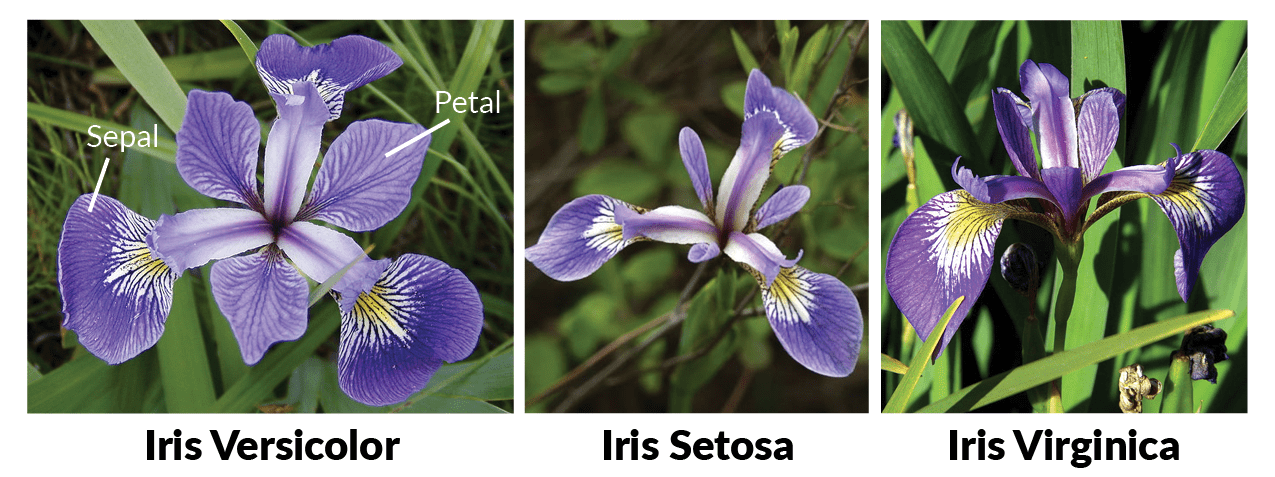


<u>Four attributes</u> are measured, that are expected to enable to distinguish multiple species of the Iris flowers. The four **attributes / features** are:

- sepal length 
- sepal width
- petal length
- petal width

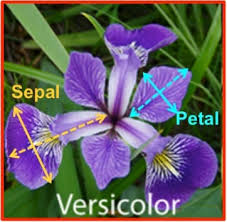

Note: Today, flower species are precisely identified by their DNA fingerprints, but in the 1930s, DNA's role in genetics had not yet been discovered!

The multivariate Iris dataset contains **150 records** each providing the values of the above four features (in cm) paired with the species of the iris flower where the measures were taken from.

$$Iris = \{ (x_1, x_2, x_3, x_4, y)^i \}_{i=1}^{150}, \quad {\bf x}\in \mathbb{R}^4, \ y\in \{Iris\ Setosa,\ Iris\ Versicolour,\ Iris\ Virginica\} $$

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

# Goal: Learn a classifier

Our goal is to learn a **classifier**, a function $f$ that given a vector of input features ${\bf x}$, predicts the iris class the measures refer to:

$$f: \mathbb{R}^4 \to \{0,1,2\}$$

Note that the dataset is small, the number of features is small too: it's a good, yet reasonable, example to learn how to deal with classification problems.

# Load the dataset using `scikit-learn`

**Scikit-learn** is THE module for doing ML in python

https://scikit-learn.org/stable/

The module also offers a number of reference datasets to play with, contained in the module `sklearn.datasets`. The iris dataset is part of it. The module also offers a specific method for loading the dataset (without taking it from an external file).

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


The `iris` object returned by the load method is a `Bunch` object, a **dictionary-like** object that contains the feature data as a numpy array, as well as a number of other useful attributes. 

In particular, the useful dictionary attributes are:
- `data`, the data to learn (two-dimensional `array`),
- `target`, the classification labels (one-dimensional `array`)
- `target_names`, the meaning of the labels, 
- `feature_names`, the meaning of the features, 
- `DESCR`, the full description of the dataset (nicely printable),
- `filename`, the physical location of iris csv dataset (not in all versions).

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
iris.data.shape

(150, 4)

In [3]:
print(iris.target.shape)
iris.target

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(iris.data.shape)
iris.data

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# The Bunch object is a dictionary
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# Exploratory Data Analysis: Visualize the data

The **feature space is four dimensional,** such that we can't really visualize the dataset.

However, we can show all data points projected into **two of the dimensions**, that will show pairwise relations.

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100 # set the resolution to x dpi

In [9]:
#import seaborn as sb

# utility functions that generates a dictionary associating to each element of an iterable
# object unique_target_values (e.g., {0,1,2} a unique color or marker, selected/generated 
# to be quite different from all other colors/markers
#
def get_color_map(unique_target_values):
    target_color_map = {}
    #palette = sb.color_palette(None, len(unique_target_values))
    palette = ['r', 'g', 'b', 'yellow', 'cyan', 'black', 'gray', 'magenta']
    for (t,c) in list(zip(unique_target_values, palette)):
        target_color_map[t] = c
    return target_color_map

def get_marker_map(unique_target_values):
    target_marker_map = {}
    markers = ['o', '>', 's', 'x', 'P', 'thin_diamond', 'hline', 'p', 'try_down', '*']
    for (t,m) in list(zip(unique_target_values, markers)):
        target_marker_map[t] = m
    return target_marker_map


Let's first plot the data in the subspace $(sepal\ length, sepal\ width)$. 

Each data point is represent with a different combination of marker and color to show the membership to the different classes / target values. 

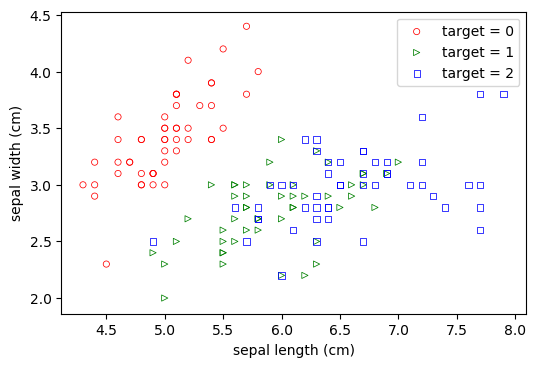

In [10]:
# just an alias
feature_data = iris.data

# the first two features
feature_x = 0 # sepal length
feature_y = 1 # sepal width

# get the colors and the markers to be used
markers = get_marker_map(set(iris.target))
colors = get_color_map(set(iris.target))

# x and y labels
plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

# loop over the different target values to show the data with different (color, marker)
for t in set(iris.target):
    plt.scatter(feature_data[iris.target == t, feature_x], 
                feature_data[iris.target == t, feature_y], 
                marker=markers[t], 
                edgecolors=colors[t], 
                facecolors='none', linewidths=0.55, s=20, label='target = {}'.format(t))
    
    # we could also use plot(), but somehow it would sound incorrect :-) 
    #plt.plot(feature_data[data.target == t, feature_x], 
    #            feature_data[data.target == t, feature_y], 
    #           marker=markers[t], color=colors[t], fillstyle='none', 
    #             linestyle='', markersize=5, label='target = {}'.format(t))

plt.legend()

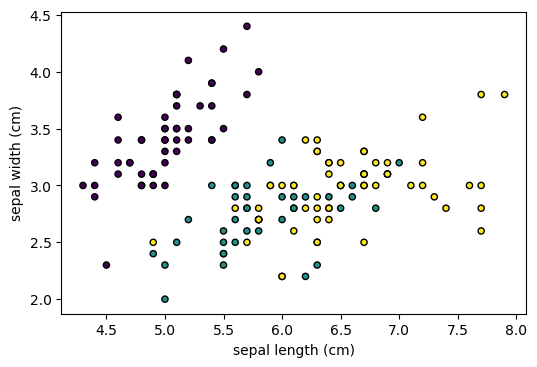

In [11]:
plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

plt.scatter(feature_data[:, feature_x], 
            feature_data[:, feature_y], 
            c=iris.target, edgecolors='k', s=20)

plt.show()

The figure shows that using only sepal length and sepal width as features, data of class target 0 (iris setosa) are well separated from the other two classes (e.g., a line separator could easily be found).

On the other hand, class targets 1 and 2 are hard to separate only based on these two features. 

Let's see what happens when we plot the data for all possible two-dimensional feature subspaces.

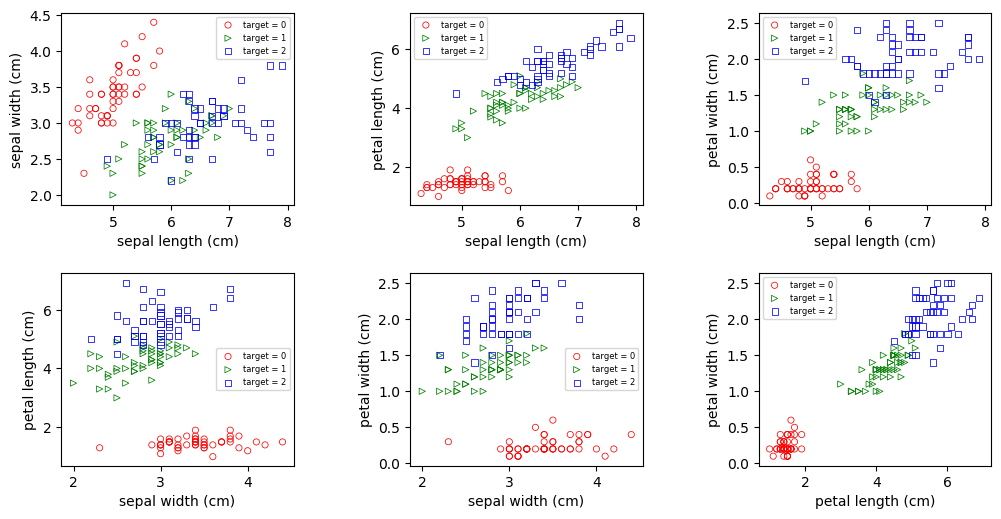

In [12]:
import itertools
import numpy as np

# all subsets of size 2 in the feature set: all possible pairings of features
feature_pairings = list(itertools.combinations(range(len(iris.feature_names)), 2))
#print(feature_pairings)

# we'll show the plots in a matrix of three columns
ncols = 3
nrows = int(len(feature_pairings) // ncols)

figure, subplots = plt.subplots(nrows, ncols, figsize=(12, 6))

# the 
markers = get_marker_map(set(iris.target))
colors = get_color_map(set(iris.target))

k = 0 # iterates over the feature pairings
for i in range(nrows):
    for j in range(ncols):
        
        feature_x = feature_pairings[k][0]
        feature_y = feature_pairings[k][1]
        k += 1

        subplots[i, j].set_xlabel(iris.feature_names[feature_x])
        subplots[i, j].set_ylabel(iris.feature_names[feature_y])

        for t in set(iris.target):
            subplots[i, j].scatter(feature_data[iris.target == t, feature_x], 
                                   feature_data[iris.target == t, feature_y], 
                                   marker=markers[t], 
                                   edgecolors=colors[t], 
                                   facecolors='none', linewidths=0.55, s=20,
                                   label='target = {}'.format(t))
        subplots[i,j].legend(prop={"size":6})
    
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

Interestingly, in all paired plots we can observe that classes 1 and 2 are difficult to separate, while class 0 is always well distinguished from the other two.

# Find a first classification *rule:* threshold-based classification

## Threshold-based classifier for the binary problem Iris Setosa vs. Not Iris Setosa

- Looking at the data plots, we can observe that **petal length** alone seems to be able to
separate Iris Setosa from the other two flower species (check subplot [1,0]).

- Question: where the cut-off value for petal length is? We are finding a **threshold rule** of the type:

    `If petal length < cut-off, Then class is Iris Setosa`


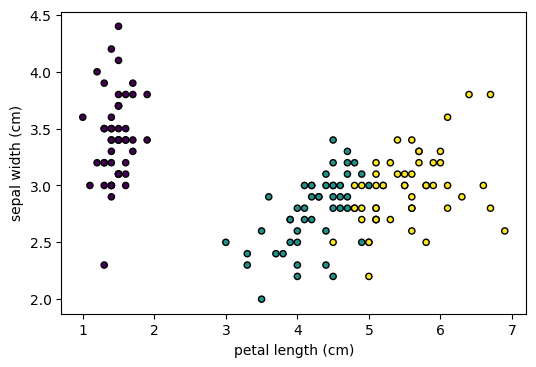

In [13]:
feature_x = 2 # petal length
feature_y = 1 # petal width

plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

plt.scatter(feature_data[:, feature_x], 
            feature_data[:, feature_y], 
            c=iris.target, edgecolors='k', s=20)

plt.show()

We need to find the maximum value of petal length such as the class is Iris setosa

In [14]:
#setosa_idx = np.where(iris.target_names == 'setosa')

# position index of the petal length feature in the data arrays
petal_length_idx = iris.feature_names.index('petal length (cm)')

# index/value of the setosa label
setosa_label = list(iris.target_names).index('setosa')

# all data with petal lengths
petal_length = feature_data[:, petal_length_idx]

# Array of booleans discriminating between data labeled as setosa and the others species
is_setosa = (iris.target == setosa_label)

# Max  value for the petal length in the data labeled as setosa
max_setosa = petal_length[is_setosa].max()

# Min value for the petal length in the data labeled as non setosa
min_non_setosa = petal_length[~is_setosa].min()

print('Maximum of setosa data: {}.'.format(max_setosa))
print('Minimum of others: {}.'.format(min_non_setosa))


Maximum of setosa data: 1.9.
Minimum of others: 3.0.


***
**We have a threshold-based classification model to the binary classification problem: $(setosa, not\ setosa)$**

    `If petal length < 1.9, Then class is Iris Setosa; 
     Else class is either Iris Virginica or Iris Versicolor`
***

## Threshold-based classifier for the binary problem Iris Virginica vs. Iris Versicolor

- The problem of recognizing Iris Setosa apart from the other two species was very easy.<br><p>

- However, we cannot immediately see what the best threshold is for distinguishing Iris Virginica from Iris Versicolor. <br><p>

- We can even see that we will **never achieve perfect separation with these features.**<br><p>

- We could, however, look for the **best possible separation,** the <u>separation that makes the fewest mistakes (on the dataset).</u> For this, we need to perform some additional computation.<br><p>


We can proceed in two steps to search for the best separation between Iris Virginica and Iris Versicolor:

1. Extract the data for Iris Versicolor and Iris Virginica.<br><p>

1. **Search for all possible combinations of feature and threshold values** (based on the dataset) and select that <u>minimizing the prediction error on the dataset.</u>

<u>Note:</u> as before, we are finding a threshold for a **binary classification problem,** between Iris Versicolor and Iris Virginica. 

We proceed by isolating Iris Virginica's data, and actually solving the problem of classifying a data point as Iris Virginica or not.

In [15]:
# get feature data and target labels for all data not classified as setosa
# note the use of boolean masks with numpy arrays to extract the elements we are interested in
#
features = iris.data[~is_setosa]
targets = iris.target[~is_setosa]
print(features.shape, targets)

# index/value of the virginica label in the dataset
virginica_label = list(iris.target_names).index('virginica')

# Array of booleans discriminating between data labeled as virginica and the others species
is_virginica = (targets == virginica_label)
print(is_virginica)

(100, 4) [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [16]:
# Initialize best_accuracy to an impossibly low value
best_accuracy = -1.0

# need to check which feature is the most discriminative one for the data labeled
# as iris virginica (given that the problem is binary, this feature will also be
# the most discriminative one for iris versicolor)
#
for feature_idx in range(features.shape[1]):
    
    # test all possible thresholds (cut-off values) based on the feature values in dataset
    thresholds = features[:, feature_idx] # array of all values for the given feature_idx
    
    for t in thresholds:
        # Get the vector of data for the feature feature_idx
        feature_vals = features[:, feature_idx]
    
        # apply the threshold t
        above_threshold = (feature_vals > t) # all values that are above the threshold
        
        #print(above_threshold)
        #print(above_threshold == is_virginica)
        
        # count all the data points that are classified correctly as virginica
        # we take the mean over all data points as a measure of accuracy
        accuracy = (above_threshold == is_virginica).mean()
        
        # the threshold can be considered in both sides, > and <, 
        # reverse_accuracy compute the prediction accuracy for the case of <
        reverse_accuracy = (above_threshold == ~is_virginica).mean() 
        
        # we take the direction which is the best, and store the information data
        if reverse_accuracy > accuracy:
            reverse = True
            accuracy = reverse_accuracy
        else:
            reverse = False

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature_idx
            best_threshold = t
            best_reverse = reverse
            
print( best_accuracy, best_feature, best_threshold, best_reverse)
print('Best feature is {:s}'
      ' - Best threshold value is: {:s} {:.2f}'.format(iris.feature_names[best_feature],
                                                ('<' if best_reverse else '>'), 
                                                best_threshold))

0.94 3 1.6 False
Best feature is petal width (cm) - Best threshold value is: > 1.60


***
**We have another threshold-based classification model to the binary classification problem: $(virginica, versicolor)$**

`If petal width > 1.6, Then class is Iris Virginica; 
 Else class is Iris Versicolor`    
***

## Threshold-based classifier for the Iris dataset

We can combine the two threshold-based models found to define a single threshold-based classifier for the Iris dataset:

`If petal length < 1.9, Then class is Iris Setosa; 
 Else If petal width > 1.6, Then class is Iris Virginica; 
      Else class is Iris Versicolor`
 

In [17]:
print(iris.feature_names)

def iris_classifier(example):
    "Apply the computed threshold model to classify a new example"
    petal_length = 2
    petal_width  = 3 
    if example[petal_length] < 1.9:
        return 'Iris setosa'
    elif example[petal_width] > 1.6:
        return 'Iris virginica'
    else:
        return 'Iris versicolor'

new_example = np.array([0.1, 2, 3.2, 1.9])
iris_classifier(new_example)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


'Iris virginica'

The threshold-based classifier implements a **binary decision tree:**

<div>
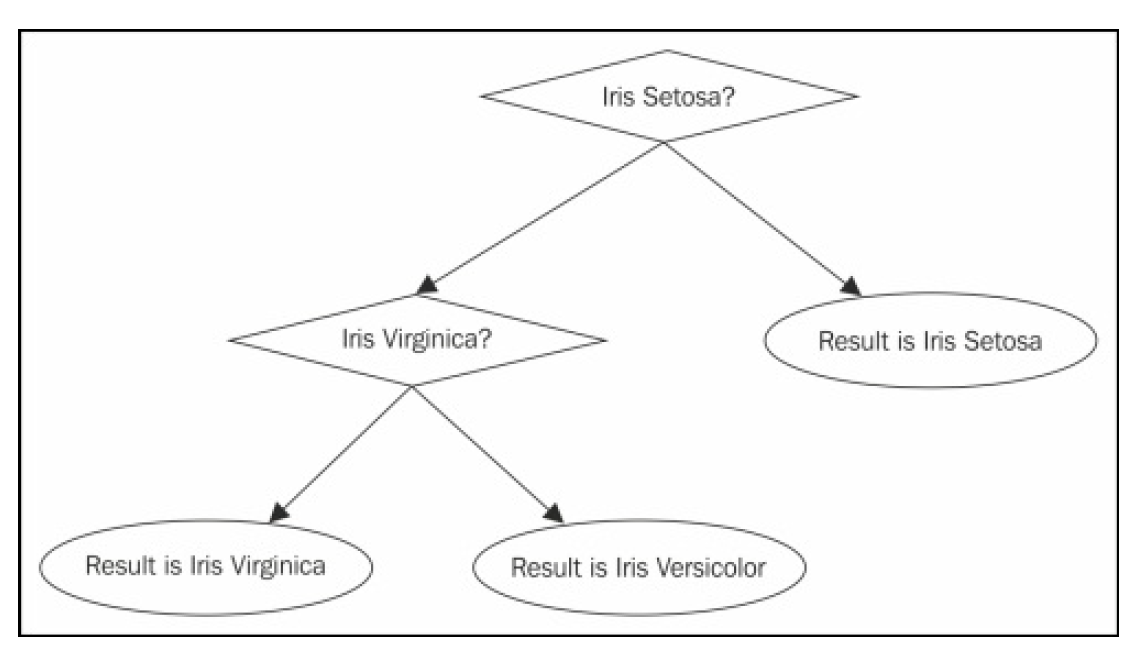
</div>

# How the **decision boundary** looks like?

Our threshold-based classifier only makes use of two features, petal length and petal width.

We can visualize the thresholds, and therefore the decision boundaries, by plotting the cut-offs together with the data in the $(petal\ length, petal\ width)$ feature subspace.

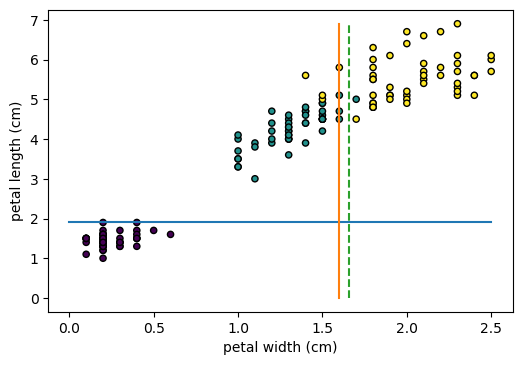

In [18]:
feature_x = iris.feature_names.index('petal width (cm)')
feature_y = iris.feature_names.index('petal length (cm)')

cut_off_petal_width  = 1.6
cut_off_petal_length = 1.9

plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

# plot the data for the selected features
plt.scatter(feature_data[:, feature_x], 
            feature_data[:, feature_y], 
            c=iris.target, edgecolors='k', s=20)

# cut-off line for the petal length (e.g., setosa vs. not setosa)
plt.plot([0, max(feature_data[:, feature_x])],  
         [cut_off_petal_length, cut_off_petal_length], linestyle='-')

# cut-off line for the petal width (e.g., virginica vs. versicolor)
plt.plot([cut_off_petal_width, cut_off_petal_width], [0, max(feature_data[:, feature_y])], 
         linestyle='-')
# another example cut-off line that would get the same performance
plt.plot([cut_off_petal_width+0.06, cut_off_petal_width+0.06], 
         [0, max(feature_data[:, feature_y])], linestyle='--')
plt.show()

- In a univariate threshold model, the decision boundary will always be a line that is parallel to one of the axes. <br><p>

- Alternative linear separators (e.g., the dashed green one) could do the job with the same performance, which one should we choose? <br><p>


**We need to have a systematic approach to choose among multiple alternatives!** (see next time)

***
# Use ML to *learn* a classifier: k-Nearest Neighbors classifier
***

## k-Nearest Neighbors classifier: main concepts

The `k-Nearest Neighbors` classifier is a **non-parametric classifier** (but can be also applied for *regression*).

Given a query point ${\bf x}$ (i.e., a new example to classify), where {\bf x} is a vector of feature values: 

1. define a **neighborhood** of the query point in the feature space where {\bf x} is defined; <br><p>

1. look in the neighborhood and check **how many examples of each class** fall in the neighborhood; <br><p>
    
1. <u>majority classification rule:</u> assign to ${\bf x} the class with the **larger number of examples!**

How do we define the neighborhood? **By the $n$-dimensional ball that contains the `k` training data points that are the *closest* to the query point.**

Yes, a **distance metric** must be defined! But this is not a problem if the feature vectors are elements of $\mathbb{R}^n$.

- Other ways to find the neighborhood can be defined, as well as classification rules other than the majority rule (e.g., using distances, not just the number of examples of a class)

<div>
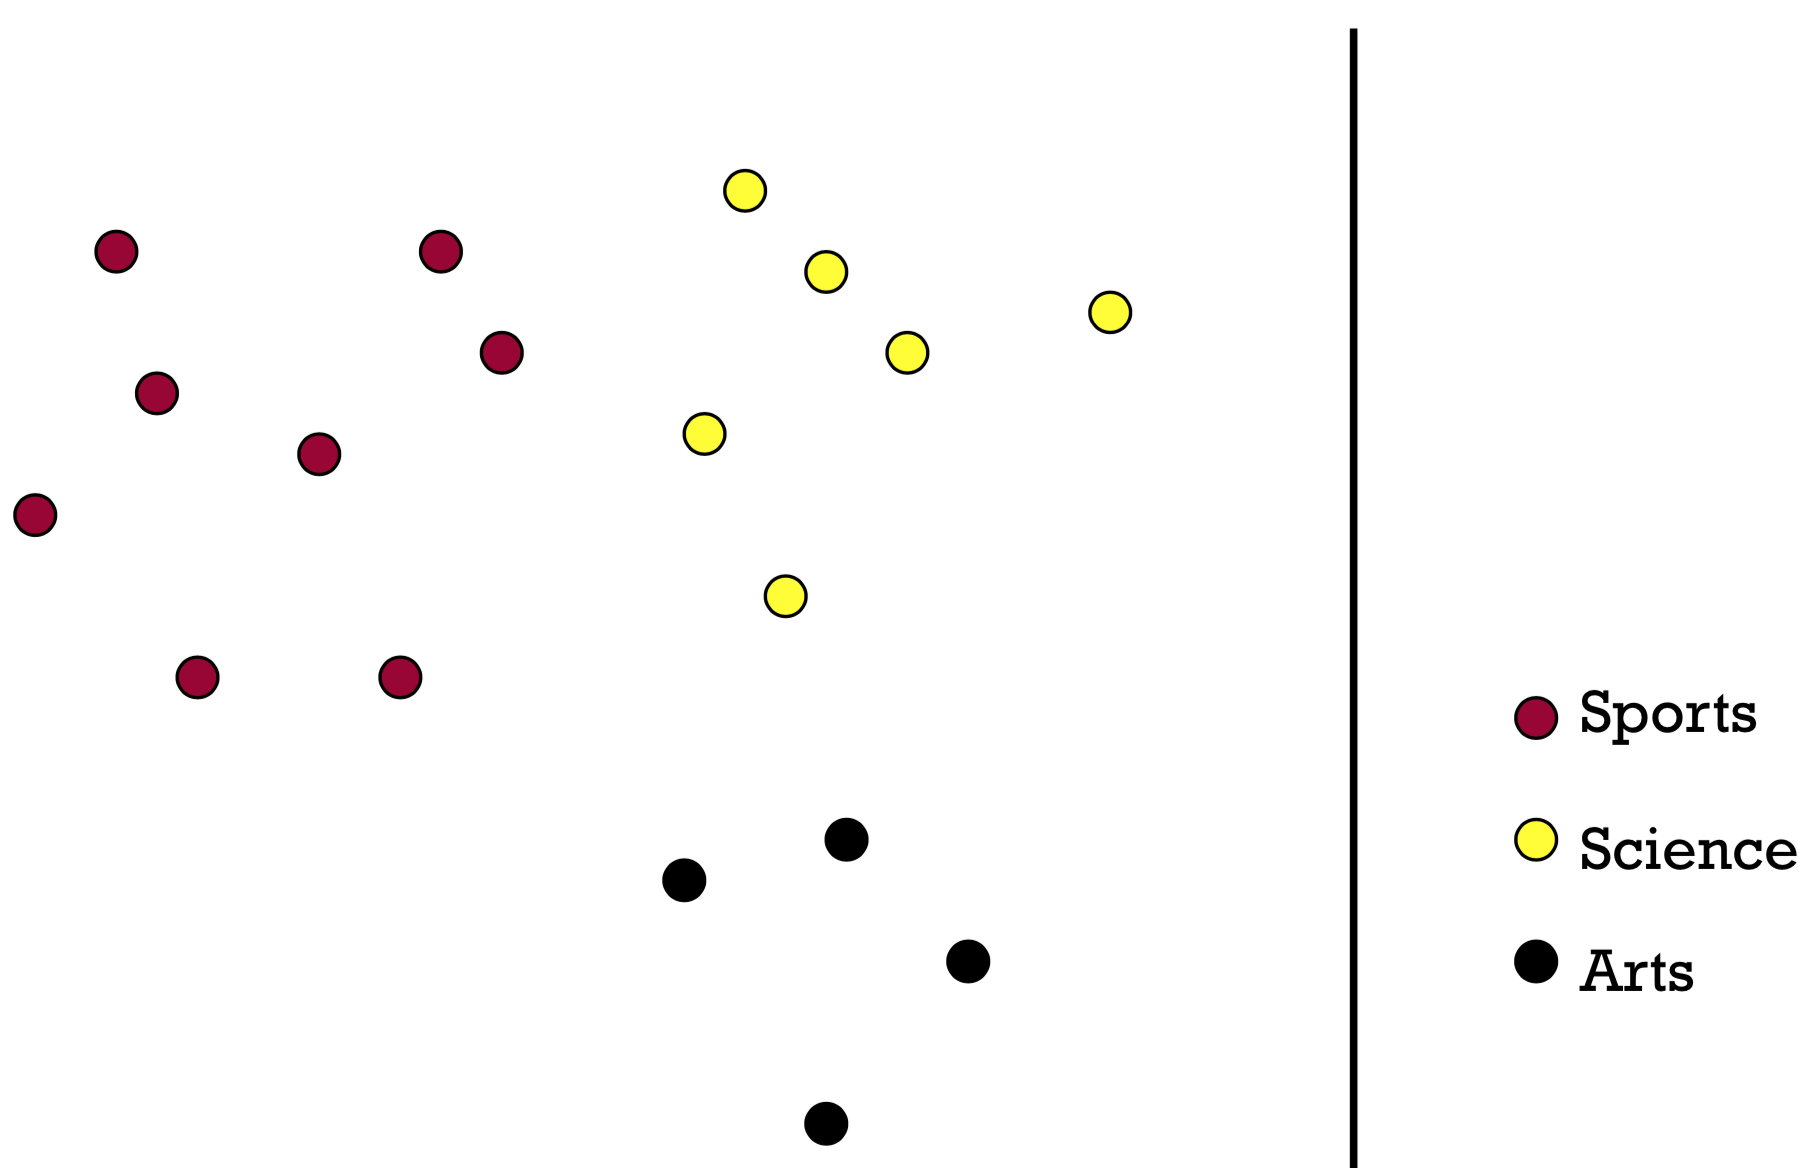
</div>

<div>
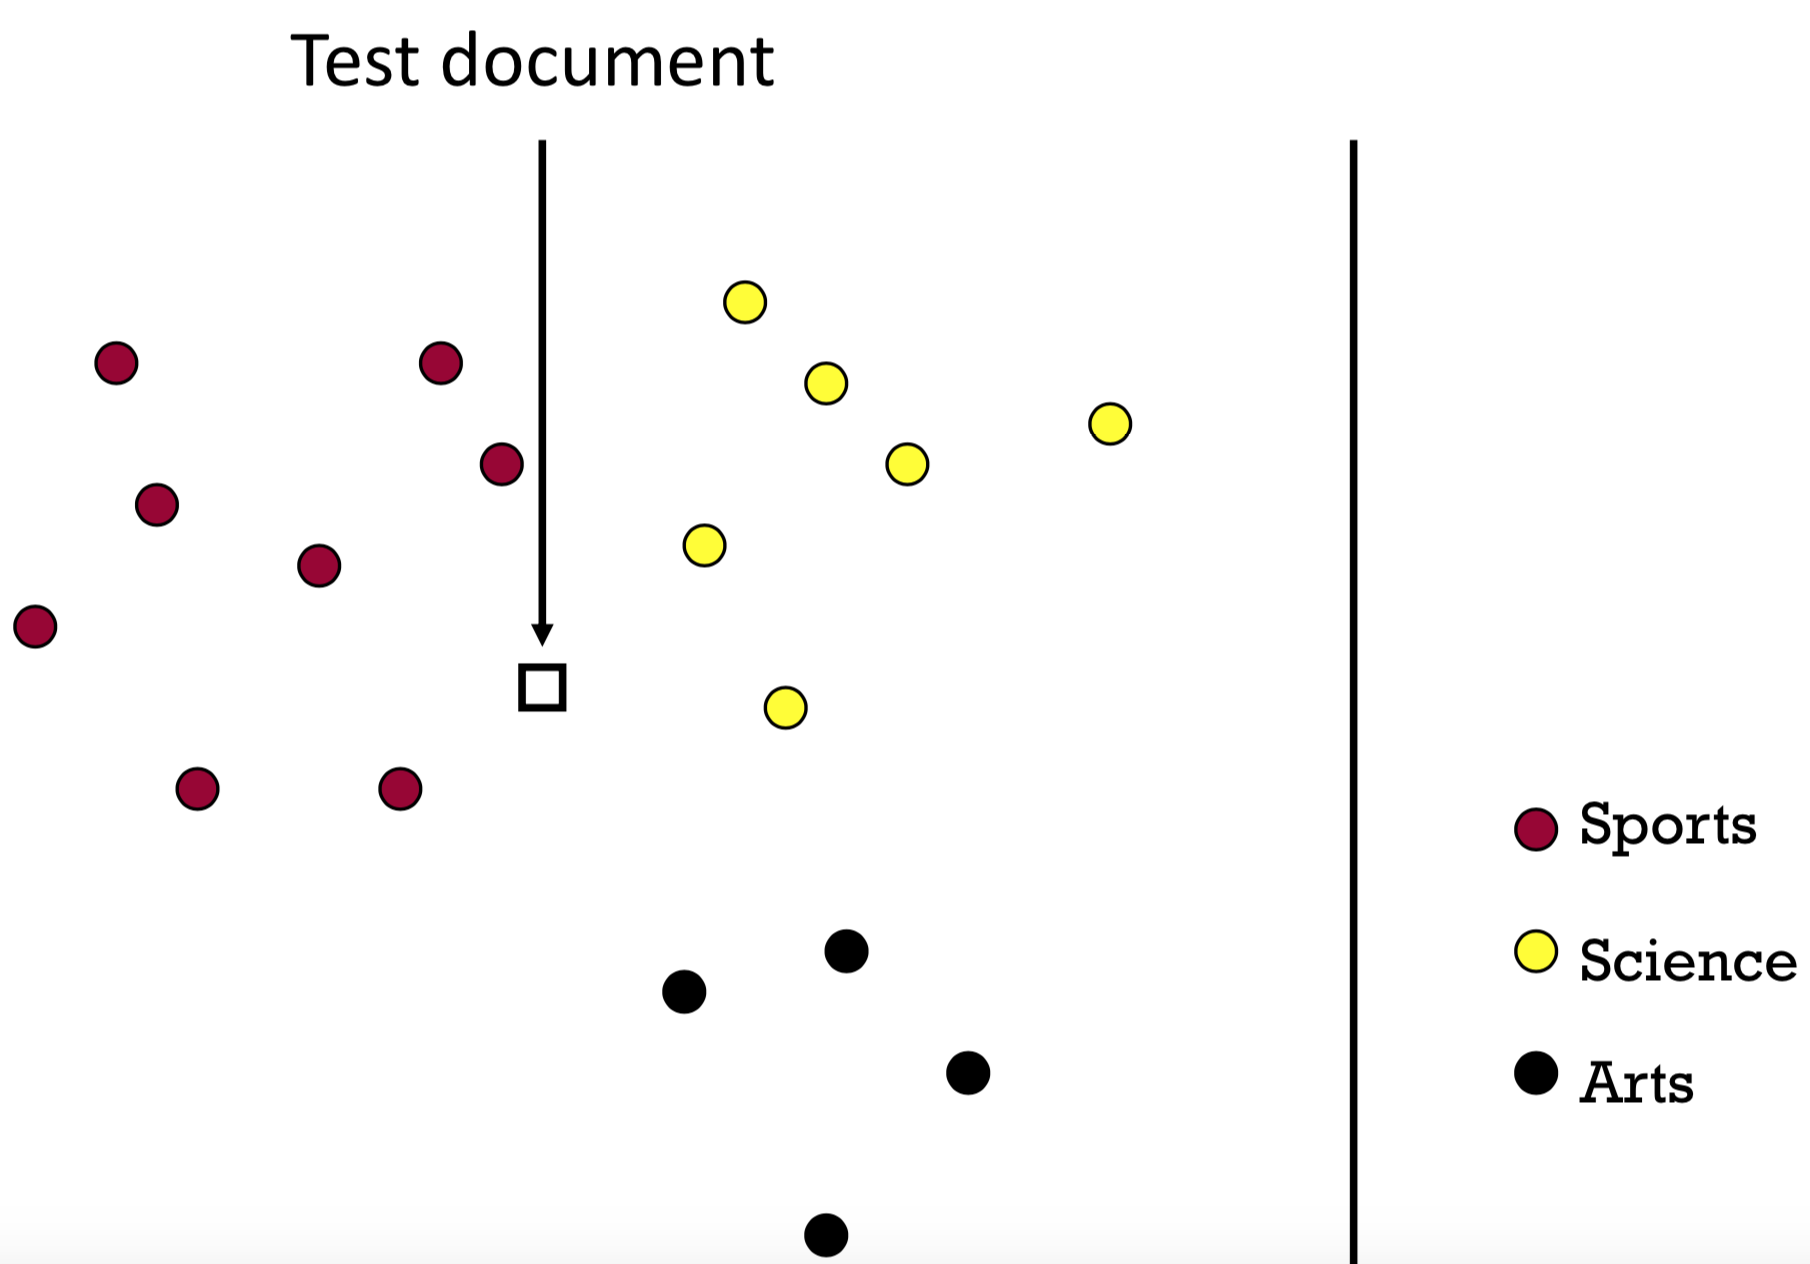
</div>

<div>
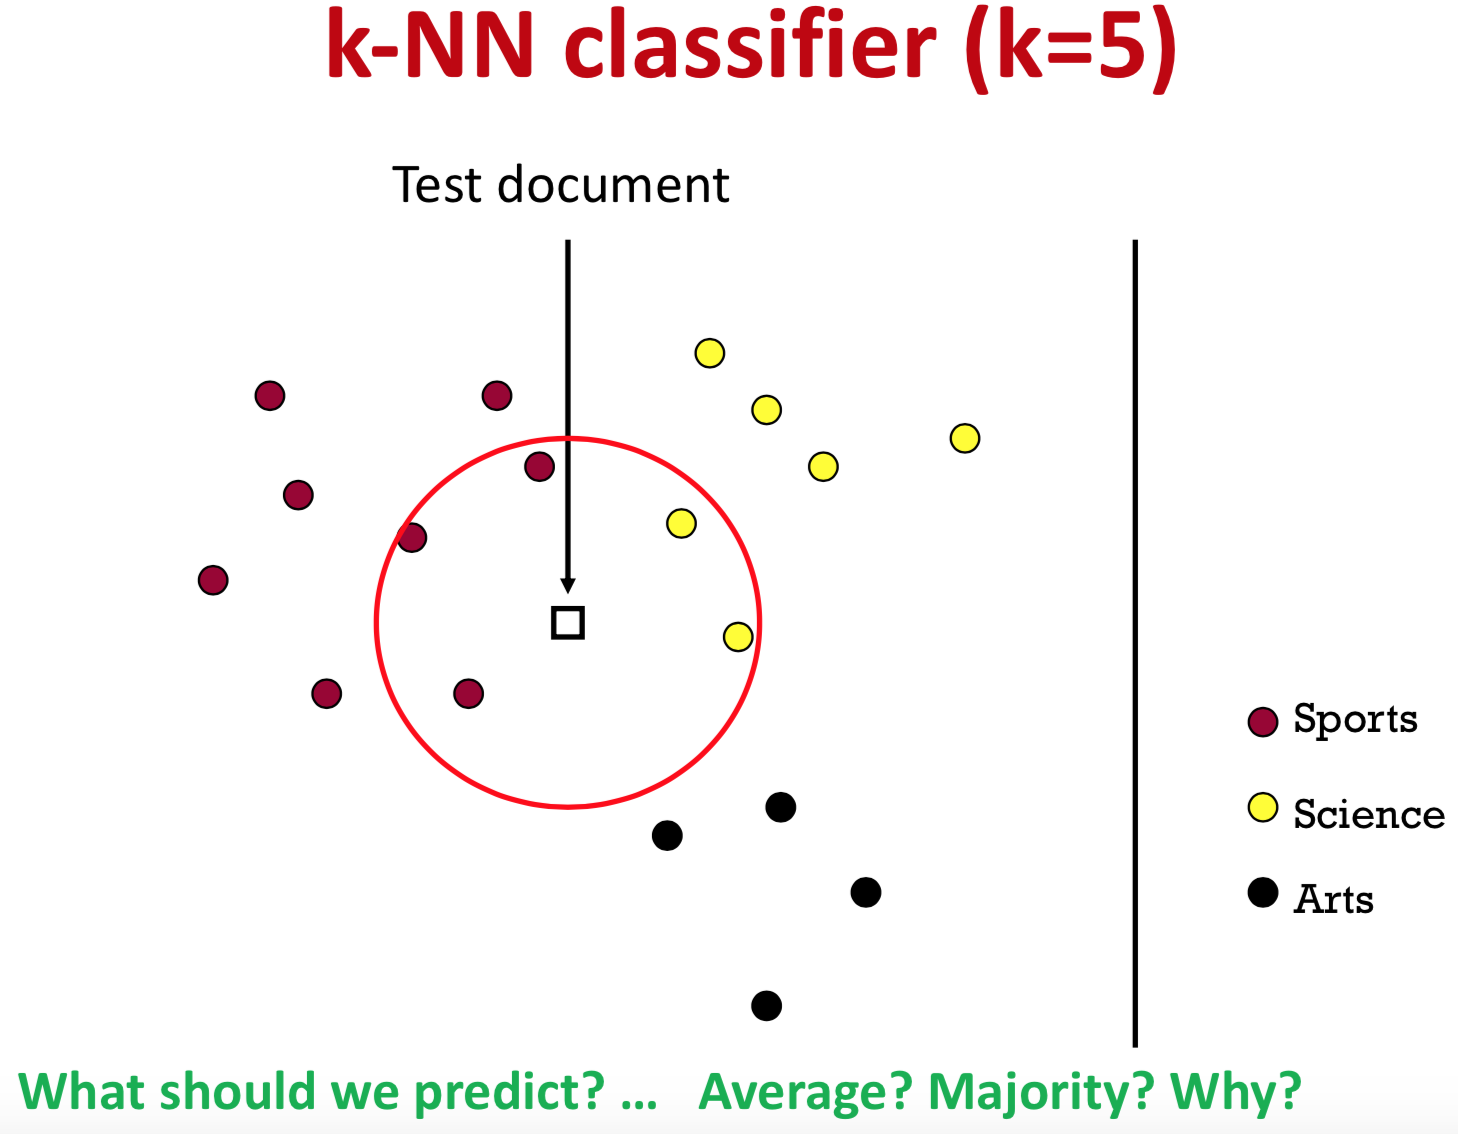
</div>

<div>
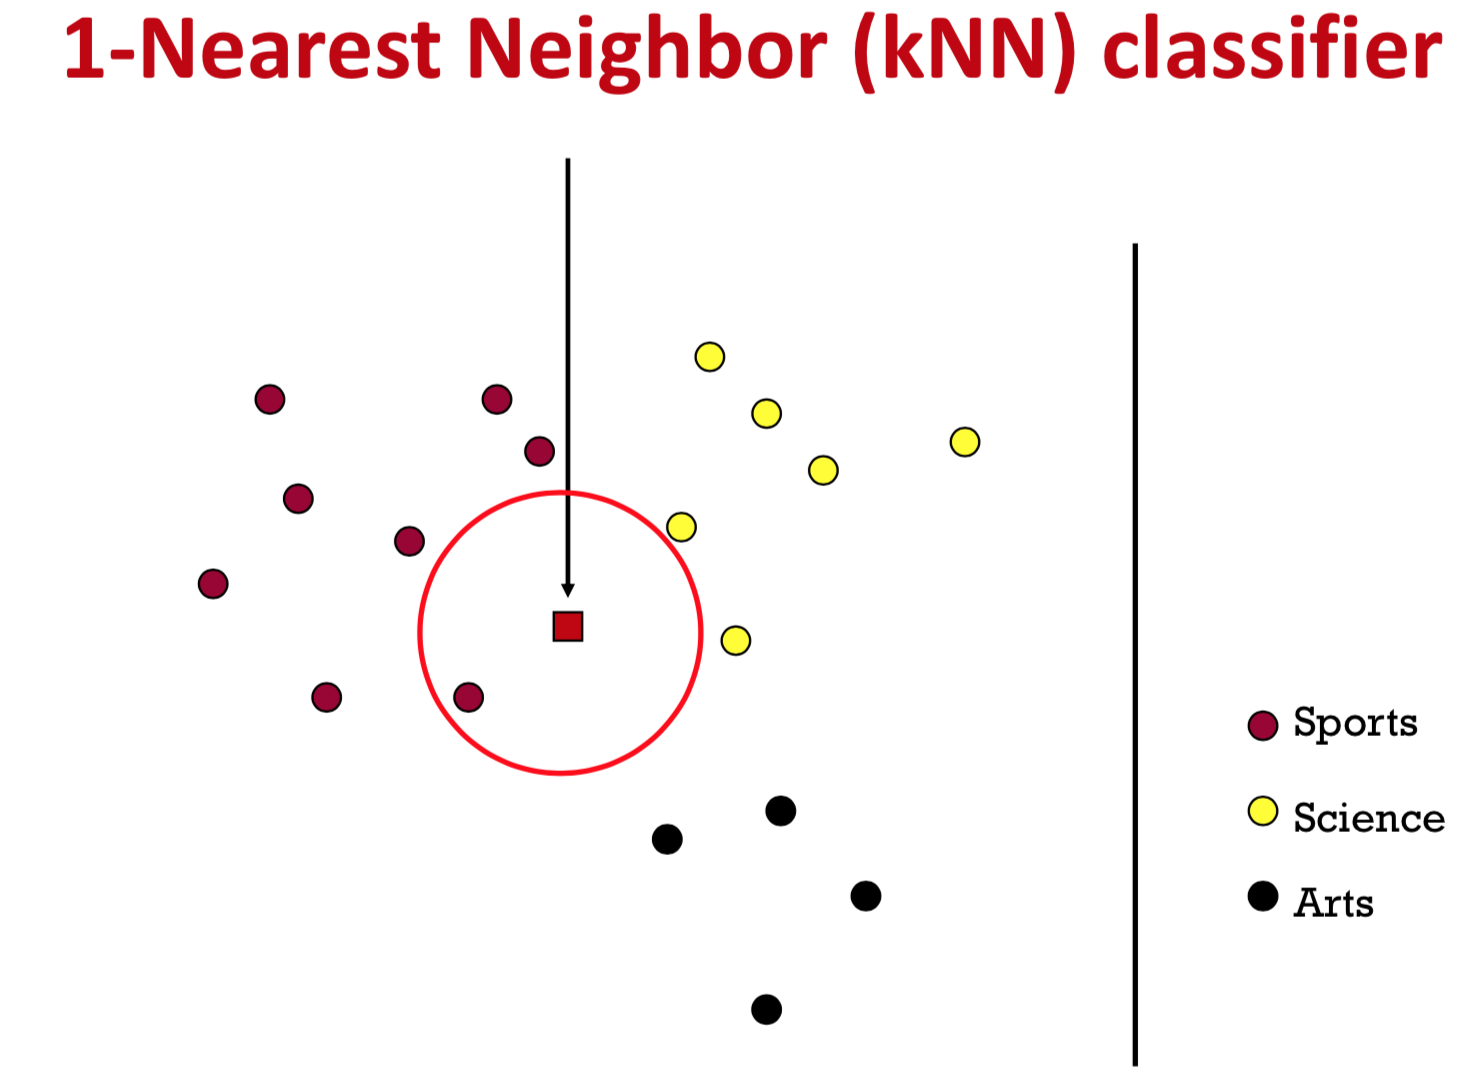
</div>

<div>
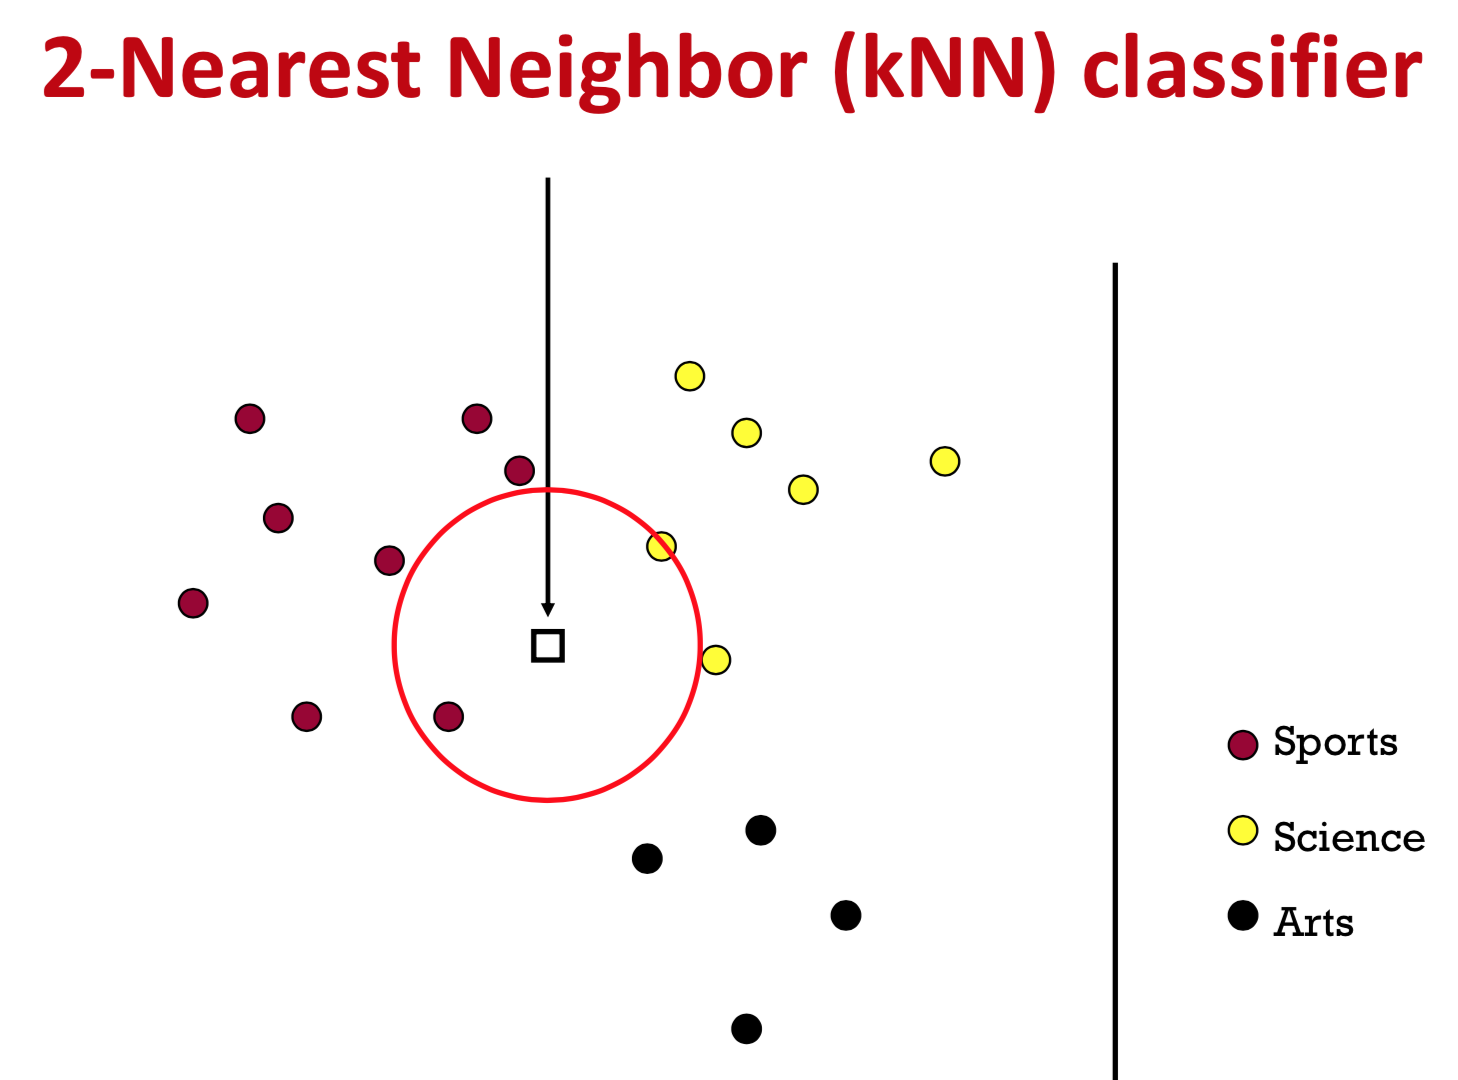
</div>

<div>
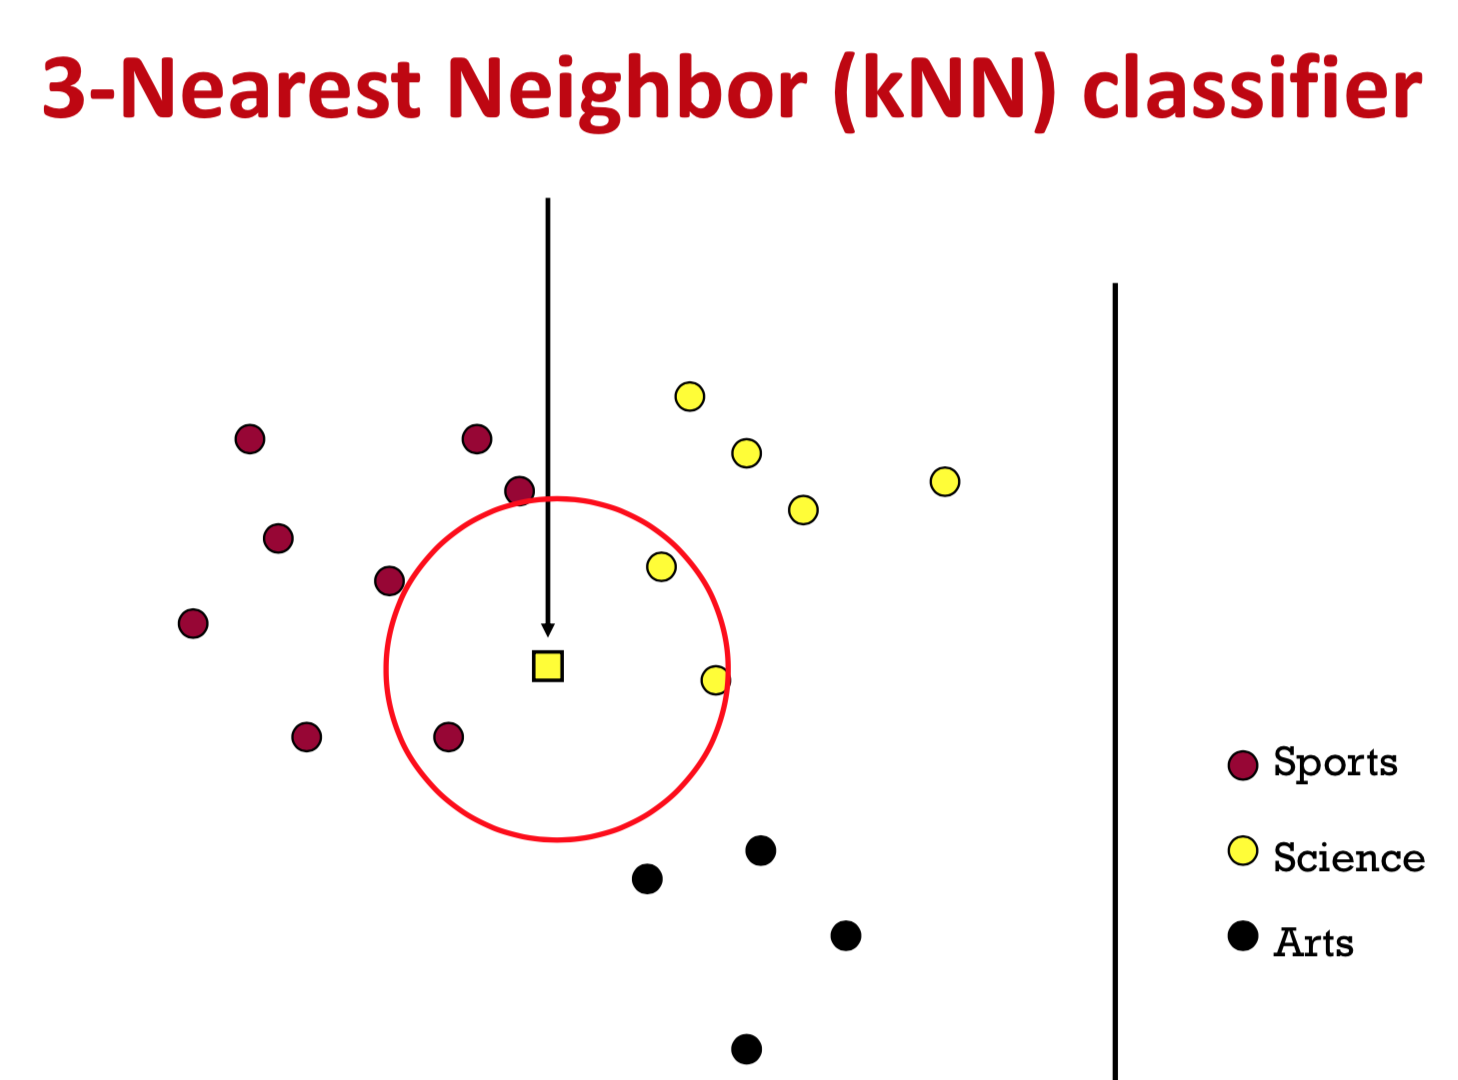
</div>

<div>
<img src="attachment:image.png" width="500"/>
</div>

<div>
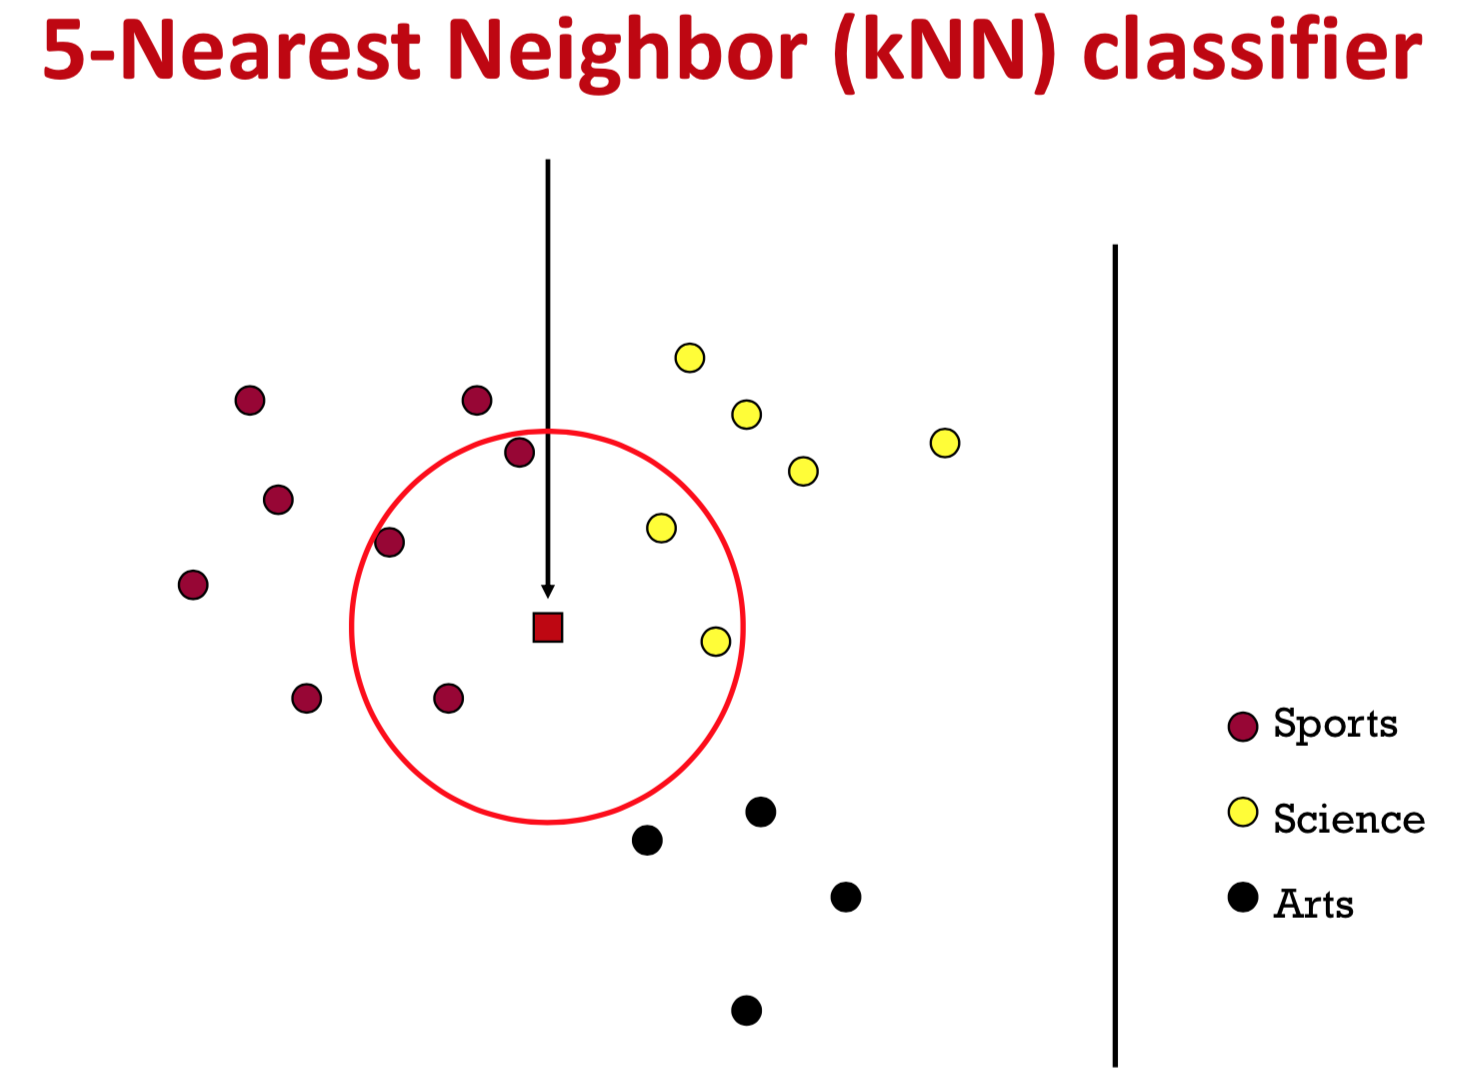
</div>

<div>
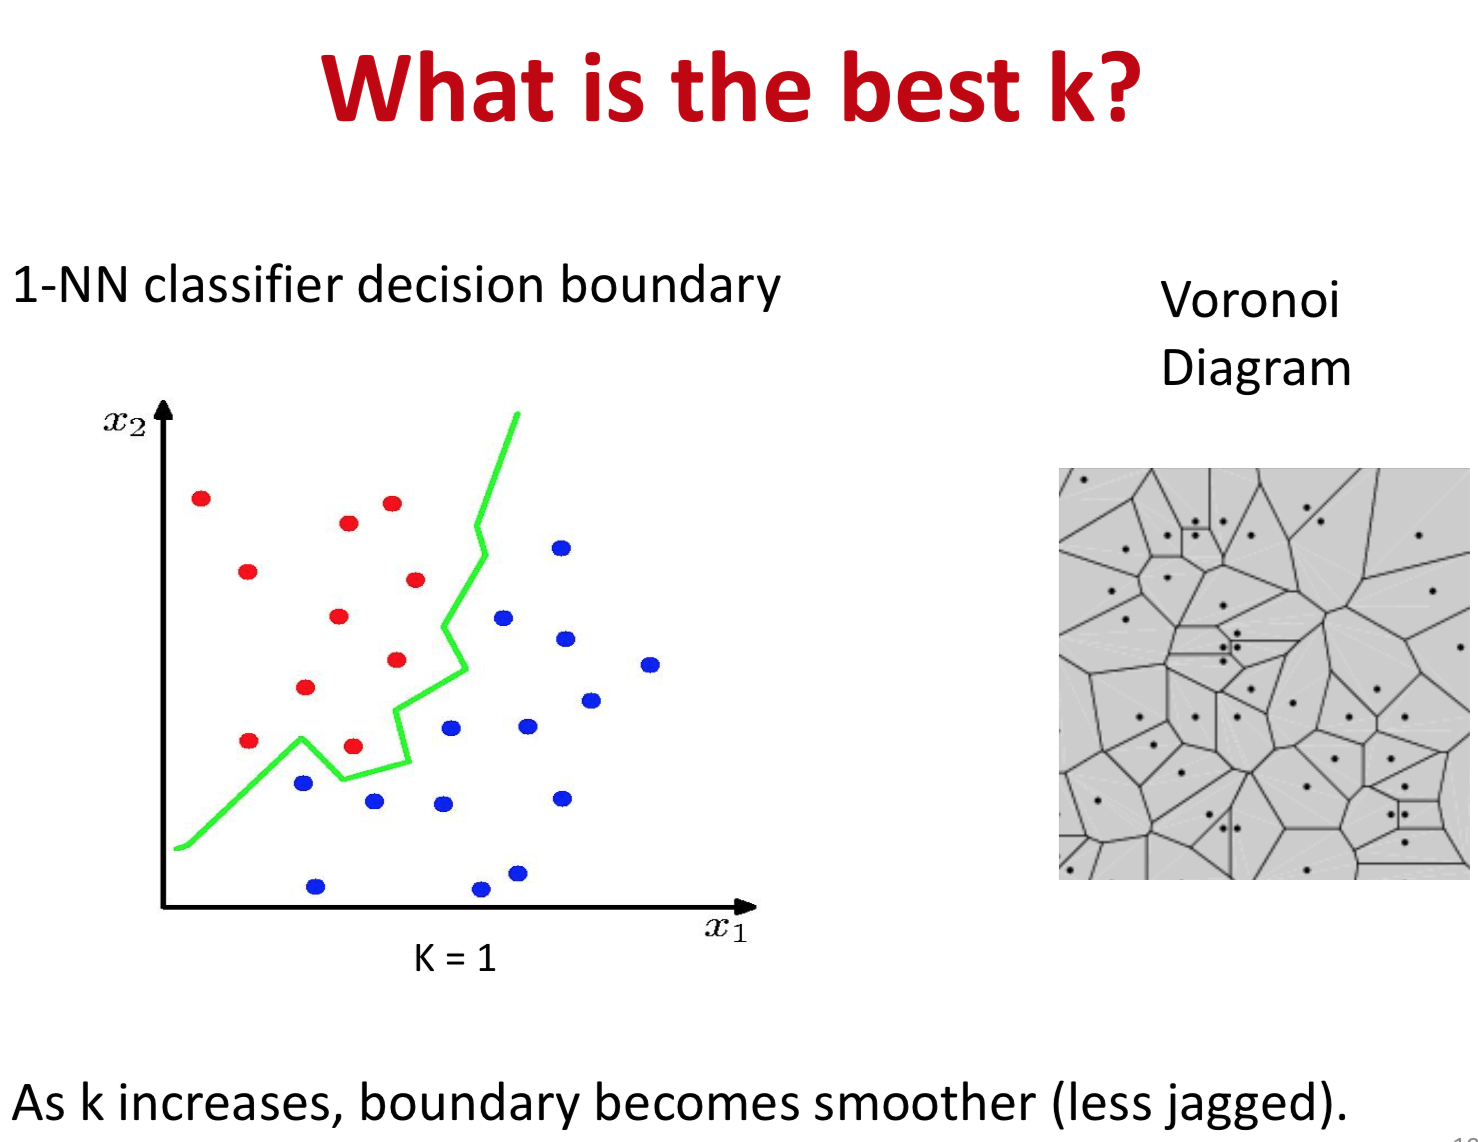
</div>

## Effect of `k` on the Iris dataset (showing only two features)

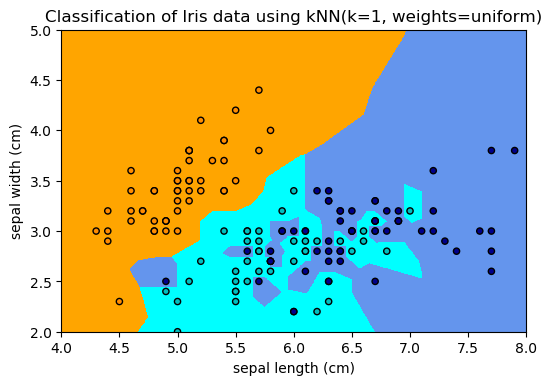

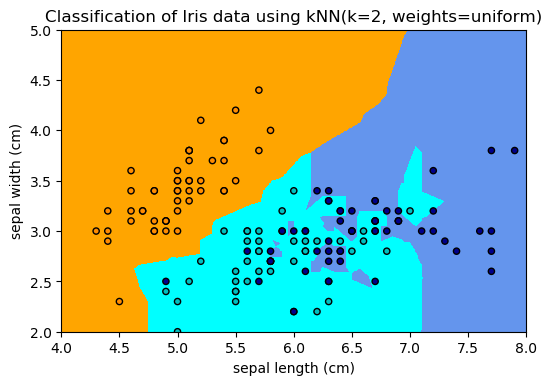

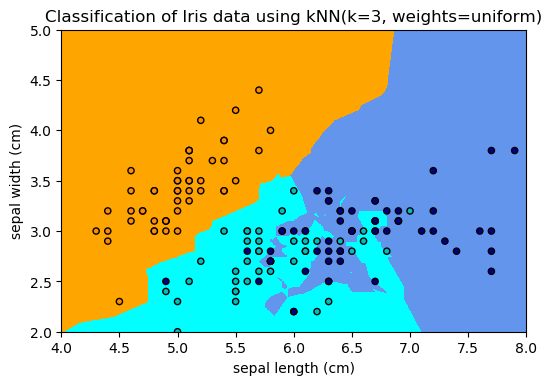

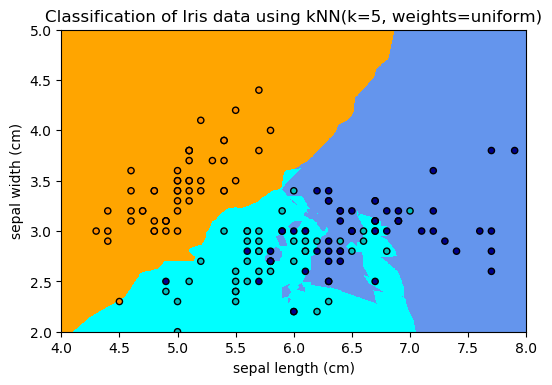

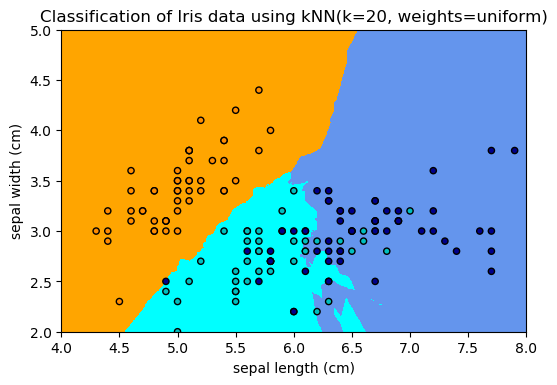